In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos del Análisis Exploratorio de Datos. Si recordamos, en la lecciones de Pandas estuvimos usando un dataset sobre ataques de tiburones, y que hicimos algunos cambios a lo largo de los ejercicios, incluimos filas, columnas e incluso limpiamos algunas colummas 💪🏽! Para todas los ejercicios de pair programming de EDA I y II usaremos el dataframe generado en el ejercicio de Pandas VII.

Pero para hacer una exploración buena del dataset no lo podemos hacer como pollo sin cabeza a ver que nos encontramos. Necesitamos hacernos una serie de preguntas o hipótesis que queramos contestar. En este caso os plantemos las siguientes preguntas a contestar a lo largo de los ejercicios de pair programming de este módulo:

In [3]:
df = pd.read_csv('../../datos/attack.csv', index_col=0)

In [4]:
df.head(2)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2
0,1800.00.00,1800.0,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, all onboard were killed by sharks",1800,NaN,y,F
1,1797.05.28.R,1797.0,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Reported May-28-1797,May,y,NaN


In [9]:
df['location'].unique()

array([nan, 'On the Thames River', 'Port Jackson', ...,
       'Sag Harbor, Suffolk County', 'Georges Head, off Port Jackson',
       'Hamelin Harbour, at Faure Island'], dtype=object)

In [5]:
df.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'age', 'time', 'species_', 'href', 'injury', 'date',
       'mes', 'fatal_', 'sex2'],
      dtype='object')

# OBJETIVOS

- ¿Cuál es el número de filas y columnas?


In [6]:
print(f'El número de filas es: {df.shape[0]} y el número de columnas es: {df.shape[1]}')


El número de filas es: 6284 y el número de columnas es: 17


- ¿Cuál es el porcentaje de valores nulos en cada columna? Presenta los resultados en un dataframe, donde las columnas sean el nombre de las variables y el porcentaje de nulos.


In [5]:
nulos =pd.DataFrame(df.isnull().sum()*100/df.shape[0])

In [6]:
nulos.rename(columns={0:'% nulos'}, inplace=True)
nulos

,% nulos
case_number,0.015913
year,0.000000
type,0.063654
country,0.795672
area,7.224698
location,8.577339
activity,8.625080
name,3.325907
age,44.875875
time,53.150859


- ¿Qué tipos de datos hay en cada columna?


In [9]:
df.dtypes

case_number     object
year           float64
type            object
country         object
area            object
location        object
activity        object
name            object
age             object
time            object
species_        object
href            object
injury          object
date            object
mes             object
fatal_          object
sex2            object
dtype: object

- Extraed la información general del dataframe.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6284 entries, 0 to 6283
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  6283 non-null   object 
 1   year         6284 non-null   float64
 2   type         6280 non-null   object 
 3   country      6234 non-null   object 
 4   area         5830 non-null   object 
 5   location     5745 non-null   object 
 6   activity     5742 non-null   object 
 7   name         6075 non-null   object 
 8   age          3464 non-null   object 
 9   time         2944 non-null   object 
 10  species_     3453 non-null   object 
 11  href         6284 non-null   object 
 12  injury       6256 non-null   object 
 13  date         6284 non-null   object 
 14  mes          5714 non-null   object 
 15  fatal_       5677 non-null   object 
 16  sex2         5720 non-null   object 
dtypes: float64(1), object(16)
memory usage: 883.7+ KB


- Cread dos dataframes nuevos, uno que incluya solo las variables categóricas y otro que incluya solo las variables numéricas.

In [11]:
# DATAFRAME CON VARIABLES CATEGÓRICAS

df_categorica = df.select_dtypes(include=['object'])
df_categorica.head(2)

,case_number,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2
0,1800.00.00,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, all onboard were killed by sharks",1800,NaN,y,F
1,1797.05.28.R,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Reported May-28-1797,May,y,NaN


In [12]:
# DATAFRAME CON VARIABLES NUMÉRICAS
df_numericas = df.select_dtypes(include=['int64', 'float'])
df_numericas

,year
0,1800.0
1,1797.0
2,1792.0
3,1791.0
4,1788.0
...,...
6279,1804.0
6280,1803.0
6281,1803.0
6282,1802.0


- ¿Cuáles son los principales estádisticos de los dataframes?


In [13]:
df.describe(include='all')

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2
count,6283,6284.000000,6280,6234,5830,5745,5742,6075,3464,2944,3453,6284,6256,6284,5714,5677,5720
unique,6283,NaN,8,212,823,4102,1530,5217,157,366,1547,6269,3728,5429,13,2,2
top,1800.00.00,NaN,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,17,Afternoon,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,1957,Jul,n,M
freq,1,NaN,4584,2222,1034,162,968,549,154,187,163,4,800,11,661,4292,5083
mean,NaN,1927.164067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,281.458635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extraed los valores únicos su frecuencia. BONUS presenta los resultados en un dataframe. 
Donde variable es cada una de las variables categóricas que tenemos en el dataset y n_unicos es una lista con los nombres de los valores únicos de cada variable.

In [14]:
columnas = list(df.columns)
columnas

['case_number',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'age',
 'time',
 'species_',
 'href',
 'injury',
 'date',
 'mes',
 'fatal_',
 'sex2']

In [15]:
valores_unicos = {'valores': [], 'n_uniques': []}



for i in columnas:

        valores_unicos['valores'].append(i)

        valores_unicos['n_uniques'].append(list(df[i].unique()))

df_unicos = pd.DataFrame(valores_unicos)
df_unicos

,valores,n_uniques
0,case_number,"[1800.00.00, 1797.05.28.R, 1792.09.12, 1791.00..."
1,year,"[1800.0, 1797.0, 1792.0, 1791.0, 1788.0, 1787...."
2,type,"[Unprovoked, Provoked, Boat, Sea Disaster, Inv..."
3,country,"[SEYCHELLES, nan, ENGLAND, AUSTRALIA, BARBADOS..."
4,area,"[St. Anne, nan, New South Wales, St Helena, Su..."
5,location,"[nan, On the Thames River, Port Jackson, Sydne..."
6,activity,"[a corsair's boat was overturned, Dropped over..."
7,name,"[nan, child, male, female, an Australian abori..."
8,age,"[nan, young, 14, 19, 20, 15, 21, 27, 36, 25, 6..."
9,time,"[nan, 22h00, 06h00, Night, 18h00, Morning, Aft..."


De qué nos sirven estos números y dataframe? Extraed conclusiones de ellos.
- ¿Hay alguna columna que no tenga sentido su tipo de datos?

La columna year es tipo de dato object y tendría más sentido que fuese int. La columna fecha también se podría cambiar a datetime. La columna age también debería ser int pero tiene descripciones como 'young' que no dan información verdadera. 

- ¿Hay alguna columna que no tenga sentido su nombre?

Hay algunas columnas a las que se les podría modificar el nombre para que sea más claro y prolijo. Ej: 'fatal_'. También hay una columna que se llama name pero no hay nombres sino descripciones de las víctimas. 

- ¿Hay alguna columna que no tenga sentido su contenido?

La columna href no nos está proveyendo de información útil, se podría eliminar. 


- ¿Hay alguna columna que tenga demasiadas categorías o valores que nos pueda hacer difícil trabajar con ella?

Las columnas species_ y injury tienen mucha información, son párrafos enteros con información que se podría filtrar. 

# HIPOTESIS

- ¿Es Australia el sitio más peligroso y letal para estar relajada en la playa?

Se podría decir que tanto Australia como EEUU son peligrosos, ya que si bien Australia tiene el máximo de ataques letales a nivel mundial, EEUU tiene el máximo de ataques totales. 

In [16]:
fatales = df[df['fatal_']=='y']

In [15]:
# Cantidad de ataques totales por pais

ataques_paises = pd.DataFrame(df.groupby('country')['case_number'].count())
ataques_paises.reset_index(inplace=True)

ataques_paises.rename(columns={'case_number':'cantidad de ataques'}, inplace=True)
ataques_paises.sort_values(by = 'cantidad de ataques', ascending=False)

,country,cantidad de ataques
204,USA,2221
14,AUSTRALIA,1335
171,SOUTH AFRICA,577
145,PAPUA NEW GUINEA,134
127,NEW ZEALAND,127
...,...,...
73,GUATEMALA,1
70,GREENLAND,1
68,GRAND CAYMAN,1
67,GHANA,1


In [17]:
# Cantidad de ataques totales por pais

fatales_paises = pd.DataFrame(fatales.groupby('country')['fatal_'].count())
fatales_paises.reset_index(inplace=True)
fatales_paises.sort_values(by = 'fatal_', ascending=False)


,country,fatal_
9,AUSTRALIA,283
140,USA,185
119,SOUTH AFRICA,106
100,PAPUA NEW GUINEA,56
84,MEXICO,42
...,...,...
111,SAUDI ARABIA,1
46,Fiji,1
42,EQUATORIAL GUINEA / CAMEROON,1
83,MEDITERRANEAN SEA,1


- ¿Hay diferencias entre los países en los ataques a hombres y mujeres?

No, en general los ataques son mucho más altos en hombres en todos los paises. 

In [33]:
sex_paises = pd.DataFrame(df.groupby(['sex2', 'country'])['case_number'].count())
sex_paises.reset_index(inplace=True)
sex_paises
#buscar como hacer para que me digas los dos sexoa para cada pais

,sex2,country,case_number
0,F,ATLANTIC OCEAN,3
1,F,AUSTRALIA,89
2,F,BAHAMAS,15
3,F,BELIZE,1
4,F,BERMUDA,2
...,...,...,...
257,M,VENEZUELA,11
258,M,VIETNAM,11
259,M,WEST INDIES,2
260,M,WESTERN SAMOA,1


In [24]:
sex_country_crosstab = pd.crosstab(df['sex2'], 
                            df['country'])
print(sex_country_crosstab)
type(sex_country_crosstab)

country   PHILIPPINES   TONGA  ADMIRALTY ISLANDS  AFRICA  ALGERIA  \
sex2                                                                
F                   0       0                  0       0        0   
M                   1       3                  1       1        1   

country  AMERICAN SAMOA  ANDAMAN / NICOBAR ISLANDAS  ANDAMAN ISLANDS  ANGOLA  \
sex2                                                                           
F                     0                           0                0       0   
M                     3                           1                1       1   

country  ANTIGUA  ...  UNITED KINGDOM  URUGUAY   USA  VANUATU  VENEZUELA  \
sex2              ...                                                      
F              0  ...               0        0   337        4          0   
M              1  ...              10        3  1788        9         11   

country  VIETNAM  WEST INDIES  WESTERN SAMOA  YEMEN  YEMEN   
sex2                               

pandas.core.frame.DataFrame

- ¿Cuáles son las edades que más sufren ataques?

In [ ]:
edades_ataques = pd.DataFrame(df.groupby('age')['case_number'].count())
edades_ataques.reset_index(inplace=True)
edades_ataques.sort_values(by='case_number', ascending=False)

,age,case_number
21,17,154
24,18,150
28,19,142
30,20,141
18,15,139
...,...,...
105,60s,1
104,60's,1
37,"21, 34,24 & 35",1
40,23 & 20,1


Las edades que más ataques sufren son 17, 18, 19, 20 y 15 años. 

In [ ]:
df['age'].unique() # No se puede realizar grafico de edades porque son strings, no se pueden ordenar y hay muchos datos sucios. 

array([nan, 'young', '14', '19', '20', '15', '21', '27', '36', '25', '6',
       '16', '50', '13 or 14', '57', '11', '48', '18', '52', '12', '32',
       '10', '34', '30', '60', '33', '29', '54', '41', '37', '56', '69',
       '38', '55', '35', '46', '45', '40s', '28', '24', '26', '49', '22',
       '7', '31', '17', '40', '13', '42', '3', '8', '82', '73', '20s',
       '68', '51', '39', '58', 'Teen', '47', '61', '65', '66', '43',
       '60s', '9', '72', '59', '64', '23', '71', '44', '62', '63', '70',
       '18 months', '53', '30s', '50s', 'teen', '77', '74', '28 & 26',
       '5', '86', '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30',
       'Teens', '36 & 26', '8 or 10', '84', '\xa0 ', ' ', '30 or 36',
       '6½', '21 & ?', '75', '33 or 37', 'mid-30s', '23 & 20', ' 30',
       '7      &    31', ' 28', '20?', "60's", '32 & 30', '16 to 18',
       '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '74 ', '45 ',
       '21 or 26', '20 ', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
     

- Independientemente de la edad, ¿sufren los hombres más ataques que las mujeres?


Sí, los hombres sufren muchos más ataques que las mujeres.
 

In [ ]:
sexo = pd.DataFrame(df.groupby('sex2')['case_number'].count())
sexo.reset_index(inplace=True)
sexo.sort_values(by='case_number', ascending=False)

,sex2,case_number
1,M,5082
0,F,637


<AxesSubplot:xlabel='sex2', ylabel='case_number'>

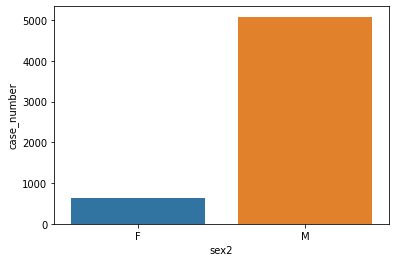

In [ ]:
sns.barplot(data=sexo, x='sex2', y='case_number')

- ¿En qué mes ocurren más ataques?


El mes en el cual ocurren más ataques es Julio. 


In [ ]:
meses = pd.DataFrame(df.groupby('mes')['case_number'].count())
meses.reset_index(inplace=True)
meses.sort_values(by='case_number', ascending=False)

,mes,case_number
5,Jul,661
1,Aug,596
12,Sep,549
4,Jan,516
6,Jun,492
0,Apr,451
11,Oct,442
2,Dec,433
7,Mar,412
10,Nov,408


- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
----Tendríamos que extraer la información de las diferentes especies en una columna nueva porque ahora la info en species esta toda sucia y mezclada.


- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

In [ ]:
df['year'].unique()

array([1800., 1797., 1792., 1791., 1788., 1787., 1786., 1785., 1784.,
       1783., 1780., 1779., 1776., 1771., 1767., 1764., 1758., 1753.,
       1751., 1749., 1755., 1748., 1742., 1738., 1733., 1723., 1721.,
       1703., 1700., 1642., 1638., 1637., 1617., 1595., 1580., 1555.,
       1554., 1543.,  500.,   77.,    5.,    0., 2018., 2017., 2016.,
       2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008., 2007.,
       2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999., 1998.,
       1997., 1996., 1995., 1984., 1994., 1993., 1992., 1991., 1990.,
       1989., 1969., 1988., 1987., 1986., 1985., 1983., 1982., 1981.,
       1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973., 1972.,
       1971., 1970., 1968., 1967., 1966., 1965., 1964., 1963., 1962.,
       1961., 1960., 1959., 1958., 1957., 1956., 1955., 1954., 1953.,
       1952., 1951., 1950., 1949., 1948., 1848., 1947., 1946., 1945.,
       1944., 1943., 1942., 1941., 1940., 1939., 1938., 1937., 1936.,
       1935., 1934.,

In [ ]:
años = df[df['year']>1800]

In [ ]:
años = pd.DataFrame(años.groupby('year')['case_number'].count())
años.reset_index(inplace=True)
años.sort_values(by='case_number', ascending=False)

,year,case_number
203,2015.0,143
205,2017.0,136
204,2016.0,130
199,2011.0,128
202,2014.0,126
...,...,...
14,1819.0,1
15,1822.0,1
16,1823.0,1
47,1859.0,1


In [ ]:
años.value_counts()

year    case_number
1801.0  1              1
1954.0  42             1
1944.0  31             1
1945.0  16             1
1946.0  26             1
                      ..
1884.0  7              1
1885.0  9              1
1886.0  15             1
1887.0  13             1
2018.0  53             1
Length: 207, dtype: int64

<AxesSubplot:xlabel='year', ylabel='case_number'>

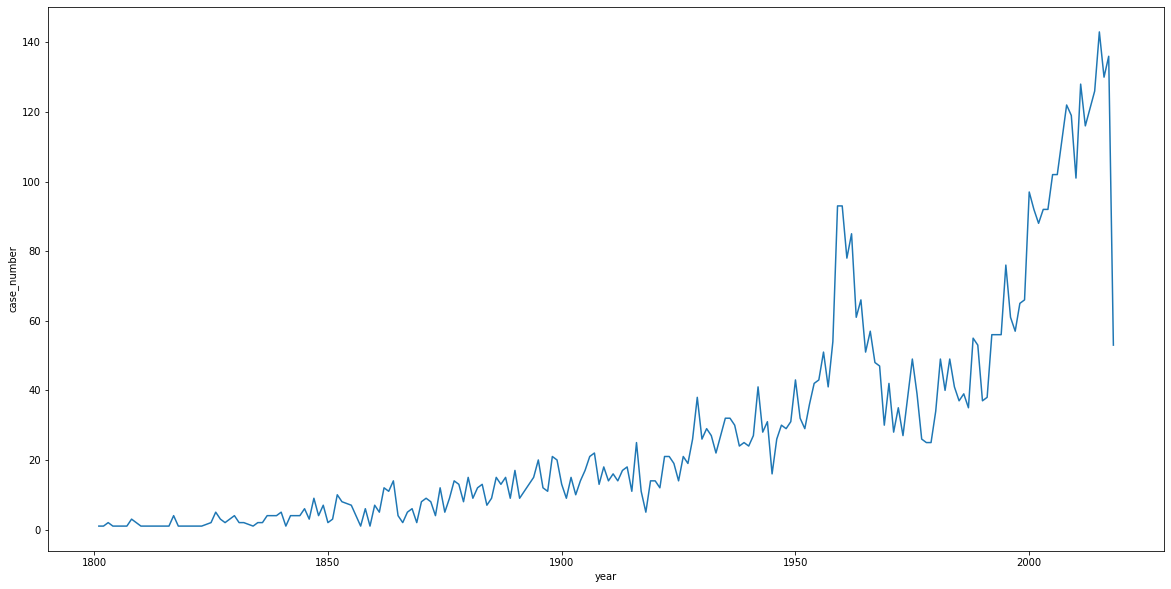

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=años, x='year', y='case_number')